### Import Libraries

In [11]:
import numpy as np       #linear algebra calculations
import pandas as pd     # processing the data

import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# read the dataset
tv_shows = pd.read_csv('tv_shows.csv')
tv_shows.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,0,1,Breaking Bad,2008,18+,9.4/10,100/100,1,0,0,0,1
1,1,2,Stranger Things,2016,16+,8.7/10,96/100,1,0,0,0,1
2,2,3,Attack on Titan,2013,18+,9.0/10,95/100,1,1,0,0,1
3,3,4,Better Call Saul,2015,18+,8.8/10,94/100,1,0,0,0,1
4,4,5,Dark,2017,16+,8.8/10,93/100,1,0,0,0,1


As we are only analyzing the data so we don’t need to use machine learning algorithms here. Most of the work can be done by visualizing and analyzing the ratings of shows on the streaming platforms.

### Data Preparations

In [13]:
tv_shows.drop_duplicates(subset='Title',keep='first',inplace=True)

fill the null values in the data with zeroes and then convert them into integer data types

In [14]:
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].fillna('0%')
# Ensure the column contains strings
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].astype(str)
# Extract the first "100" value from the string
tv_shows['Rotten Tomatoes'] = tv_shows['Rotten Tomatoes'].str.split('/').str[0]
# Convert to numeric
tv_shows['Rotten Tomatoes'] = pd.to_numeric(tv_shows['Rotten Tomatoes'])

tv_shows['IMDb'] = tv_shows['IMDb'].fillna(0)
tv_shows['IMDb'] = tv_shows['IMDb'].str.split('/').str[0]

# Convert non-finite values (e.g., NaN) to zero
tv_shows['IMDb'] = tv_shows['IMDb'].replace([np.inf, -np.inf, np.nan], 0)

# Now convert to float and then to integer
tv_shows['IMDb'] = tv_shows['IMDb'].astype(float).round().astype(int)

In [15]:
tv_shows_long=pd.melt(tv_shows[['Title','Netflix','Hulu','Disney+',
                                'Prime Video']],id_vars=['Title'],
                      var_name='StreamingOn', value_name='Present')
tv_shows_long = tv_shows_long[tv_shows_long['Present'] == 1]
tv_shows_long.drop(columns=['Present'],inplace=True)

In [17]:
tv_shows_combined = tv_shows_long.merge(tv_shows, on='Title', how='inner')
tv_shows_combined.drop(columns = ['Unnamed: 0','Netflix',
                                  'Hulu', 'Prime Video', 'Disney+'], inplace=True)

<Axes: xlabel='StreamingOn'>

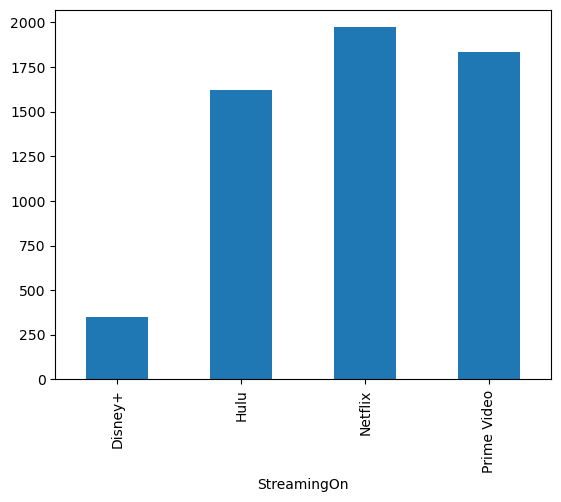

In [18]:
tv_shows_both_ratings = tv_shows_combined[(tv_shows_combined.IMDb > 0) & tv_shows_combined['Rotten Tomatoes'] > 0]
tv_shows_combined.groupby('StreamingOn').Title.count().plot(kind='bar')

In [19]:
figure = []
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'IMDb', color='StreamingOn'))
figure.append(px.violin(tv_shows_both_ratings, x = 'StreamingOn', y = 'Rotten Tomatoes', color='StreamingOn'))
fig = make_subplots(rows=2, cols=4, shared_yaxes=True)

for i in range(2):
    for j in range(4):
        fig.add_trace(figure[i]['data'][j], row=i+1, col=j+1)

fig.update_layout(autosize=False, width=800, height=800)        
fig.show()

In [20]:
px.scatter(tv_shows_both_ratings, x='IMDb',
           y='Rotten Tomatoes',color='StreamingOn')

Conclusion:

By using the violin chart we can observe that:

    1. Hulu, Netflix, and Amazon Videos all have important data. As content increases, quality decreases for all three.
    2. Prime Videos has become denser in the top half when looking at IMDB and performs well in cool.
    3. Disney+ being new, has also been very successful in this area.

Using the scatter plot we can observe that it is quite obvious that Amazon Prime performs very well in the fourth quadrant. Even by using the bar plot, we can observe that Amazon prime had a great quantity of content. So looking at all the streaming platforms we can conclude that Amazon Prime is better in both quality and quantity.